In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class DirectionManipulator:
  def __init__(self, latent_dim, target_direction):
    self.latent_dim = latent_dim
    self.target_direction = target_direction / torch.norm(target_direction)

    self.transform = nn.Parameter(torch.eye(latent_dim))
    self.optimizer = optim.Adam([self.transform], lr=0.001)

  def get_direction(self, vectors):
    centered = vectors = vectors.mean(dim=0, keepdim=True)

    U, S, V = torch.svd(centered)

    return V[:, 0]

    def transform_vectors(self, vectors):
      return torch.matmul(vectors, self.transform)

    def compute_loss(self, vectors):
      transformed = self.transform_vectors(vectors)
      current_directoin = self.get_direction(transformed)

      alignment_loss = -torch.abs(torch.dot(current_direction, self.target_direction))

      identity = torch.eye(self.latent_dim, device=vectors.device)
      orthogonality_loss = torch.norm(torch.matmul(self.transform, self.transform.t()) - identity)
      return alignment_loss + 0.1 * orthogonality_loss

    def train_step(self, vectors):
      self.optimizer.zero_grad()
      loss = self.compute_loss(vectors)
      loss.backward()
      self.optimizer.step()
      return loss.item()

    def fit(self, vectors, n_epochs=100):
      losses = []
      for epoch in range(n_epochs):
        loss = self.train_step(vectors)
        losses.append(loss)
      return losses

    def main():
      latent_dim = 8
      n_samples = 100

      vectors = torch.randn(n_samples, latent_dim)
      target_direction = torch.randn(latent_dim)

      manipulator = DirectionManipulator(latent_dim, target_direction)
      losses = manipulator.fit(vectors)

      new_vectors = torch.randn(10, latent_dim)
      transformed = manipulator.transform_vectors(new_vectors)

      return transformed

    if __name__ == "__main__":
      main()




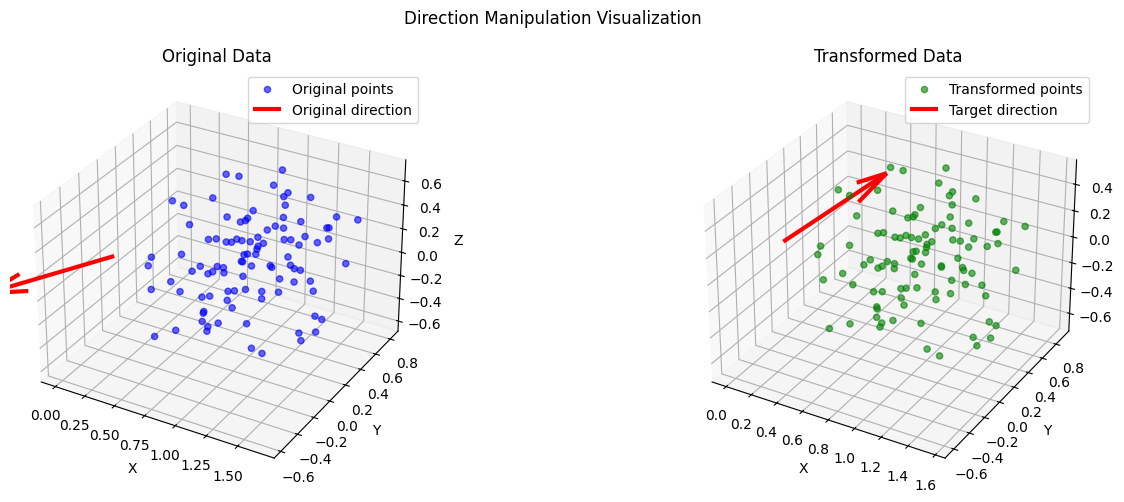

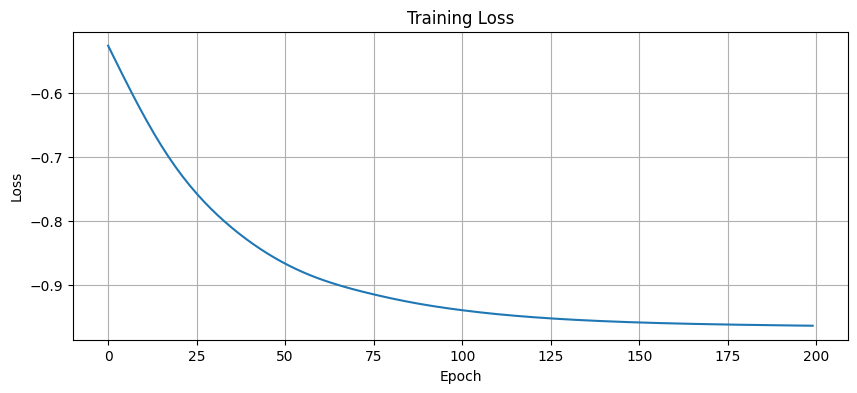

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DirectionManipulator:
  def __init__(self, latent_dim, target_direction):
    self.latent_dim = latent_dim
    self.target_direction = target_direction / torch.norm(target_direction)
    self.transform = nn.Parameter(torch.eye(latent_dim))
    self.optimizer = optim.Adam([self.transform], lr=0.001)

  def get_direction(self, vectors):
    centered = vectors - vectors.mean(dim=0, keepdim=True)
    U, S, V = torch.svd(centered)
    return V[:, 0]

  def transform_vectors(self, vectors):
    return torch.matmul(vectors, self.transform)

  def compute_loss(self, vectors):
    transformed = self.transform_vectors(vectors)
    current_direction = self.get_direction(transformed)
    alignment_loss = -torch.abs(torch.dot(current_direction, self.target_direction))

    identity = torch.eye(self.latent_dim, device=vectors.device)
    orthogonality_loss = torch.norm(torch.matmul(self.transform, self.transform.t()) - identity)
    return alignment_loss + 0.1 * orthogonality_loss

  def train_step(self, vectors):
    self.optimizer.zero_grad()
    loss =self.compute_loss(vectors)
    loss.backward()
    self.optimizer.step()
    return loss.item()

  def fit(self, vectors, n_epochs=100):
    losses = []
    for epoch in range(n_epochs):
      loss = self.train_step(vectors)
      losses.append(loss)
    return losses

def visualize_transformation(original_vectors, transformed_vectors, original_direction, target_direction, title):
  fig = plt.figure(figsize=(15, 5))

  ax1 = fig.add_subplot(121, projection='3d')
  ax1.scatter(original_vectors[:, 0],
              original_vectors[:, 1],
              original_vectors[:, 2],
              c='blue', alpha=0.6, label='Original points')

  ax1.quiver(0, 0, 0,
             original_direction[0].item(),
             original_direction[1].item(),
             original_direction[2].item(),
             color='red', linewidth=3, label='Original direction'
             )

  ax1.set_title('Original Data')
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_zlabel('Z')
  ax1.legend()

  ax2 = fig.add_subplot(122, projection='3d')
  ax2.scatter(transformed_vectors[:, 0],
              transformed_vectors[:, 1],
              transformed_vectors[:, 2],
              c='green', alpha=0.6, label='Transformed points')

  ax2.quiver(0, 0, 0,
             target_direction[0].item(),
             target_direction[1].item(),
             target_direction[2].item(),
             color='red', linewidth=3, label='Target direction')

  ax2.set_title('Transformed Data')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.set_zlabel('Z')
  ax2.legend()

  plt.suptitle(title)
  plt.tight_layout()
  return fig

def main():
  torch.manual_seed(42)
  latent_dim = 3
  n_samples =100

  direction = torch.tensor([1.0, 0.2, 0.1])
  noise = torch.randn(n_samples, latent_dim) * 0.3
  vectors = direction.repeat(n_samples, 1) + noise

  target_direction = torch.tensor([0.2, 1.0, 0.1])

  manipulator = DirectionManipulator(latent_dim, target_direction)
  losses = manipulator.fit(vectors, n_epochs=200)

  transformed_vectors = manipulator.transform_vectors(vectors)

  original_direction = manipulator.get_direction(vectors)

  fig = visualize_transformation(
      vectors.detach().numpy(),
      transformed_vectors.detach().numpy(),
      original_direction.detach(),
      target_direction,
      title="Direction Manipulation Visualization"
  )

  plt.figure(figsize=(10, 4))
  plt.plot(losses)
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()

  return vectors, transformed_vectors, losses

if __name__ == "__main__":
  main()
